### ### Filters applying Pt. 4. Discretization and quantization of the image

Discretization algorithm:
    <ol>
        <li>
            Define K - kernel size
        </li>
        <li>
            Resize source image size in the way that (h - w % K == 0)
        </li>
        <li>
            Set kernel on at the first index in image, move kernel through the image and compute average of each color separately.
        </li>
        <li>
            Set each pixel as average in current kernel. 
        </li>
        <li>
            Then skip next K pixels and repeat steps from 3 to 5 until the whole image will be processed. 
        </li>
        <li>
            Reset original size of the image.
        </li>
    </ol>

In [51]:
import cv2
from matplotlib import pyplot as plt
import numpy as np


def displayImage(image, color_option=None):
    plt.imshow(image, color_option)
    plt.axis('off')
    

image_path = '../03.jpg'

bgr_image = cv2.imread(image_path, 0)


Converting BGR to RGB image. Display source image.

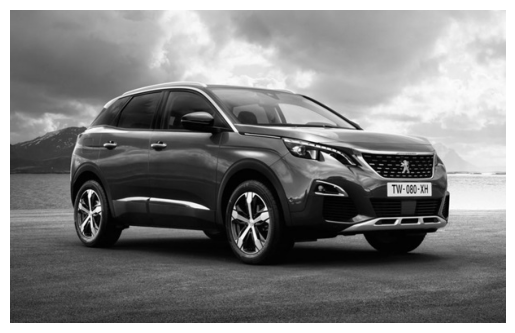

In [52]:
source_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB)

displayImage(source_image)

Defining source image shape.

In [53]:
image_shape = source_image.shape

Defining function for discretization:
    <ol>
        <li>
            Modify original height and width of the source image to make it multiple of K.
        </li>
        <li>
            Resize image with new size.
        </li>
        <li>
            Go through the image with step K.
        </li>
        <li>
            Set each pixel at the current kernel state with average in this kernel.
        </li>
        <li>
            Reset previous size of the image.
        </li>
    </ol>
    

In [54]:
def makeDiscretization(image, image_shape, K=10):
    source_height, source_width = image_shape[0], image_shape[1]
    
    h = (source_height - source_height % K)
    w = (source_width - source_width % K)
    
    image = cv2.resize(image, (w, h))
    
    for y in range(0, h - 1, K):
        for x in range(0, w - 1, K):
            if len(image_shape) > 2:
                average = np.average(image[y:(y+K), x:(x+K)], axis=0)
            else:
                average = np.average(image[y:(y+K), x:(x+K)])
            
            image[y:(y+K), x:(x+K)] = average
    
    image = cv2.resize(image, (source_width, source_height))
    
    return image

Call ```makeDiscretization(image, image_shape, K=10)``` method and display outpot image.

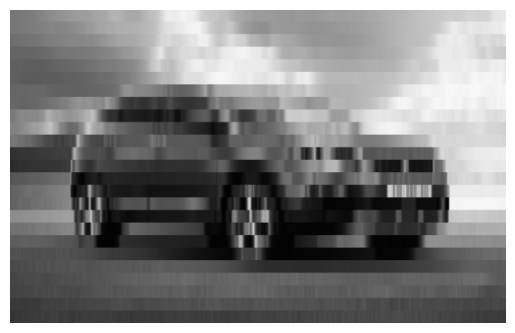

In [55]:
output_image = makeDiscretization(source_image, image_shape, K=15)

displayImage(output_image)